In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import umap.umap_ as umap
from sklearn.manifold import TSNE

/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


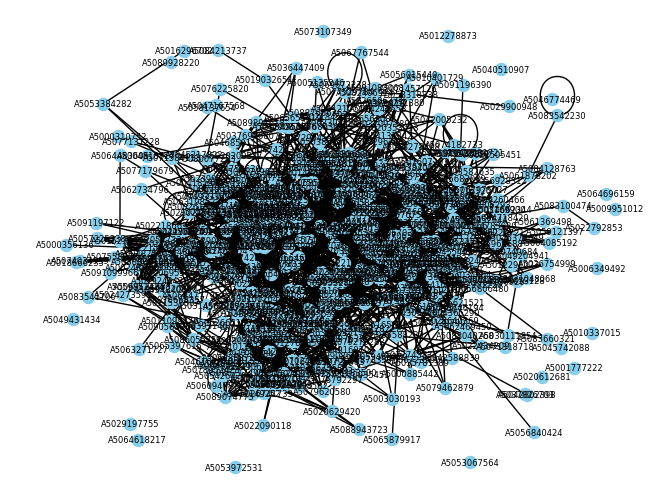

In [2]:
G = nx.read_graphml('ppg_graph.graphml')

nx.draw(G, with_labels=True, node_color='skyblue', node_size=75, edge_cmap=plt.cm.Blues, pos=nx.spring_layout(G, k=0.35), font_size=6)

# Show the plot
plt.show()

In [3]:
df = pd.read_csv('7&6ppg_works_since_2004.csv')
df.head()

,work_id,work_title,work_display_name,work_publication_year,work_publication_date,author_id,author_name,author_position,institution_id,institution_name,institution_country_code,concept_name
0,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5065379079,Miguel G. Xavier,first,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization
1,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5062060864,Marcelo Veiga Neves,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization
2,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5075787478,Fábio Diniz Rossi,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization
3,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5009859711,Tiago Ferreto,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization
4,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5018576433,Timoteo Alberto Peters Lange,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215031 entries, 0 to 215030
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   work_id                   215031 non-null  object
 1   work_title                214935 non-null  object
 2   work_display_name         214935 non-null  object
 3   work_publication_year     215031 non-null  int64 
 4   work_publication_date     215031 non-null  object
 5   author_id                 215031 non-null  object
 6   author_name               215031 non-null  object
 7   author_position           215031 non-null  object
 8   institution_id            215031 non-null  object
 9   institution_name          215031 non-null  object
 10  institution_country_code  215027 non-null  object
 11  concept_name              215020 non-null  object
dtypes: int64(1), object(11)
memory usage: 19.7+ MB


In [5]:
df_unique = df.drop_duplicates(subset=['work_id'])
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36891 entries, 0 to 215030
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   work_id                   36891 non-null  object
 1   work_title                36879 non-null  object
 2   work_display_name         36879 non-null  object
 3   work_publication_year     36891 non-null  int64 
 4   work_publication_date     36891 non-null  object
 5   author_id                 36891 non-null  object
 6   author_name               36891 non-null  object
 7   author_position           36891 non-null  object
 8   institution_id            36891 non-null  object
 9   institution_name          36891 non-null  object
 10  institution_country_code  36891 non-null  object
 11  concept_name              36888 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.7+ MB


In [6]:
df_unique.head()

,work_id,work_title,work_display_name,work_publication_year,work_publication_date,author_id,author_name,author_position,institution_id,institution_name,institution_country_code,concept_name
0,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5065379079,Miguel G. Xavier,first,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Virtualization
6,W2000268015,Server consolidation with migration control fo...,Server consolidation with migration control fo...,2011,2011-10-01,A5009859711,Tiago Ferreto,first,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Computer science
10,W2124585980,CASViD: Application Level Monitoring for SLA V...,CASViD: Application Level Monitoring for SLA V...,2012,2012-07-01,A5070685713,Vincent C. Emeakaroha,first,I145847075,TU Wien,AT,Testbed
15,W2036926646,AutoElastic: Automatic Resource Elasticity for...,AutoElastic: Automatic Resource Elasticity for...,2016,2016-01-01,A5008805433,Rodrigo da Rosa Righi,first,I61722147,Universidade do Vale do Rio dos Sinos,BR,Elasticity (physics)
21,W3164167844,VANET simulators: an updated review,VANET simulators: an updated review,2021,2021-05-06,A5018387266,Julia Silva Weber,first,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Vehicular ad hoc network


In [7]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
most_common_values = df_unique['concept_name'].value_counts().head(35)

concepts = most_common_values.index.tolist()

# Create a dictionary that maps each unique value to a random color
color_map = {value: mcolors.to_hex(np.random.rand(3,)) for value in concepts}


In [8]:
print(color_map)

{'Computer science': '#23e66d', 'Humanities': '#ebc5e7', 'Medicine': '#c4be32', 'Physics': '#248440', 'Combinatorics': '#389dcf', 'Mathematics': '#446293', 'Artificial intelligence': '#678250', 'Cloud computing': '#26b7f9', 'Cluster analysis': '#9af8cc', 'Heuristics': '#077b36', 'Usability': '#628a2e', 'Agile software development': '#f0e2c1', 'Workflow': '#496c8b', 'Context (archaeology)': '#873f59', 'Wireless sensor network': '#63aa08', 'Segmentation': '#87b6ab', 'Automatic summarization': '#99ae76', 'Visualization': '#9deb19', 'Code refactoring': '#0c4c89', 'Psychology': '#b2da66', 'Middleware (distributed applications)': '#bdc812', 'Reinforcement learning': '#d818c0', 'Reuse': '#7a3159', 'Biology': '#a7d1d1', 'Philosophy': '#47cf71', 'MPSoC': '#127313', 'Computer network': '#bf8ac0', 'Recommender system': '#a43e33', 'Robot': '#815827', 'Popularity': '#7c0faa', 'Session (web analytics)': '#607fd2', 'Ontology': '#e91d9f', 'Robustness (evolution)': '#10e27a', 'GRASP': '#84d48f', 'Field

In [9]:
with open('works_since_2004.json', 'r') as f:
    works = json.load(f)

In [10]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

if torch.cuda.is_available():
    # Specify the GPU device
    device = torch.device("cuda:0")
else:   
    device = torch.device("cpu")

model.to(device)


/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [11]:
def get_embedding(text, device='cpu'):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=2048)
    tokens = tokens.to(device)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs['last_hidden_state'][:,0,:].cpu().numpy()

In [12]:
embeddings = []
colors = []
knowledge_areas = set()

for work in works:

    title = work.get('title')
    if title is None:
        title = ''

    concepts = work.get('concepts', [])

    # Criar uma string com o título seguido de todos os concepts
    text_to_embed = title + ' ' + ' '.join([concept['display_name'] for concept in concepts])

    # Se nem o título nem os concepts estiverem presentes, pule este registro
    if not text_to_embed.strip():
        continue

    embed = get_embedding(text_to_embed, device=device)
    embeddings.append(embed)

    # Verifique se 'concepts' existe no trabalho antes de tentar acessá-lo
    concept_name = work['concepts'][0]['display_name'] if 'concepts' in work and work['concepts'] else None

    # Adicionamos as áreas de conhecimento ao conjunto
    knowledge_areas.add(concept_name)
    # Agora mapeamos o display_name para uma cor
    color = color_map.get(concept_name, "grey")  # use grey como cor padrão se o conceito não for encontrado
    colors.append(color)

# Convertendo o conjunto para uma lista para ser mais amigável
knowledge_areas = list(knowledge_areas)
print(knowledge_areas)

['Bessel function', 'Copula (linguistics)', 'Geographic routing', 'Web query classification', 'Think aloud protocol', 'Plasmid', 'Standard illuminant', 'Subclass', 'Radiodensity', 'Interface (matter)', 'Gossip', 'Sagittal plane', 'Sorption', 'Probabilistic logic', 'Reflex', 'Thymoglobulin', 'Percept', 'Nondeterministic algorithm', 'Higher education', 'Quadratic unconstrained binary optimization', 'Sink (geography)', 'Diagrammatic reasoning', 'Requirements elicitation', 'Economic geography', 'Propionate', 'Coccidia', 'Angiology', 'Reed–Solomon error correction', 'Resilience (materials science)', 'MNIST database', 'Train', 'USable', 'Action research', 'KRAS', 'Test strategy', 'Activation function', 'Plasma', 'Homosexuality', 'Selfishness', 'Feeling', 'Pressure drop', 'Limbic encephalitis', 'Bounded function', 'Quadratic equation', 'Uniformization (probability theory)', 'Structuring', 'Activity-based costing', 'XML', 'Treponema', 'BitTorrent', 'Presentation (obstetrics)', 'Ninth', 'AC pow

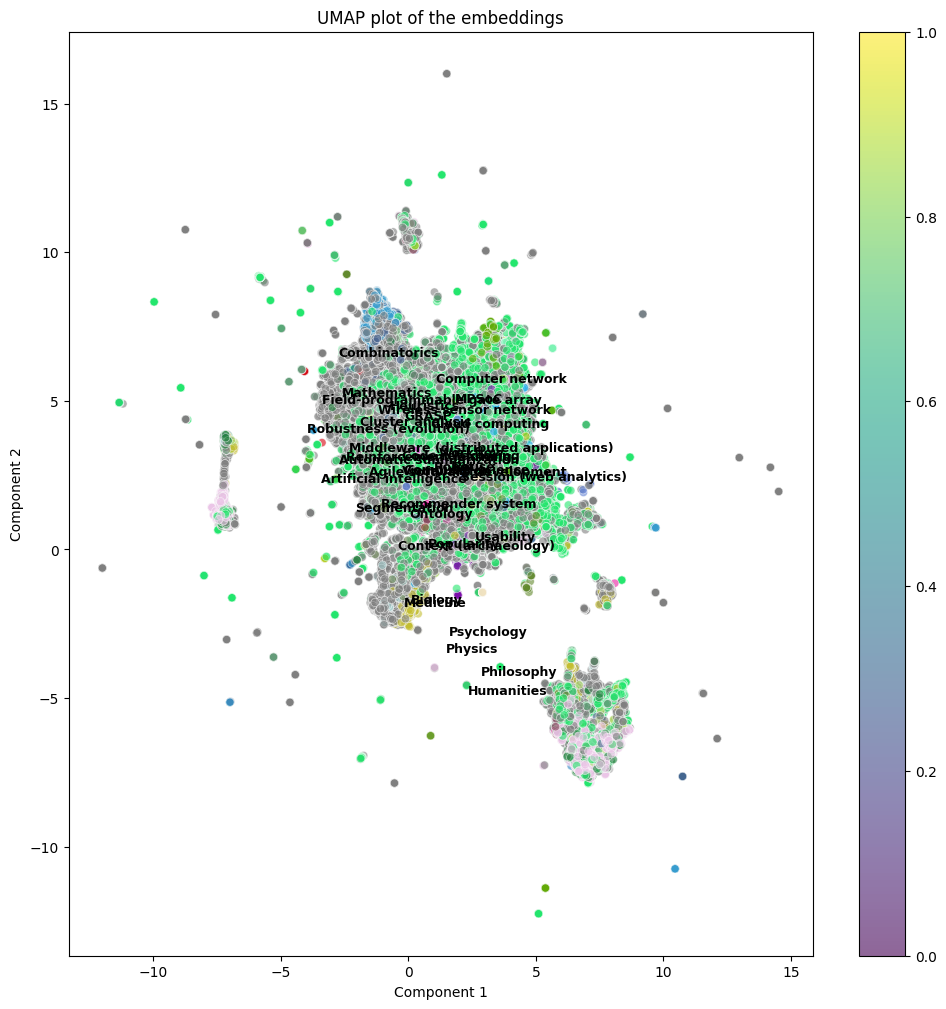

In [13]:
# Média ao longo da dimensão 1 para converter embeddings bidimensionais em unidimensionais
embeddings_2D = np.mean(embeddings, axis=1)

# Aplicar UMAP
reducer = umap.UMAP()
reduced_embeddings = reducer.fit_transform(embeddings_2D)

# Criar uma figura maior
plt.figure(figsize=(12, 12))

# Plotar os embeddings reduzidos
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)

# Obter as áreas de conhecimento a partir do mapa de cores
knowledge_areas = list(color_map.keys())

# Para cada área, encontrar o ponto central e plotar o nome
for area in knowledge_areas:
    # Obtém os pontos desse cluster
    cluster_points = reduced_embeddings[np.array(colors) == color_map[area]]
    
    # Se há pontos no cluster
    if len(cluster_points) > 0:
        # Calcula a média dos pontos para obter o centro
        center_x, center_y = np.mean(cluster_points, axis=0)
        
        # Plotar o nome da área no centro
        plt.text(center_x, center_y, area, fontsize=9, ha='center', va='center', weight='bold')

# Adicionar um mapa de cores (opcional, caso `colors` seja uma lista de valores numéricos)
plt.colorbar(scatter)

# Adicionar título e rótulos aos eixos (opcional)
plt.title("UMAP plot of the embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Mostrar o gráfico
plt.show()


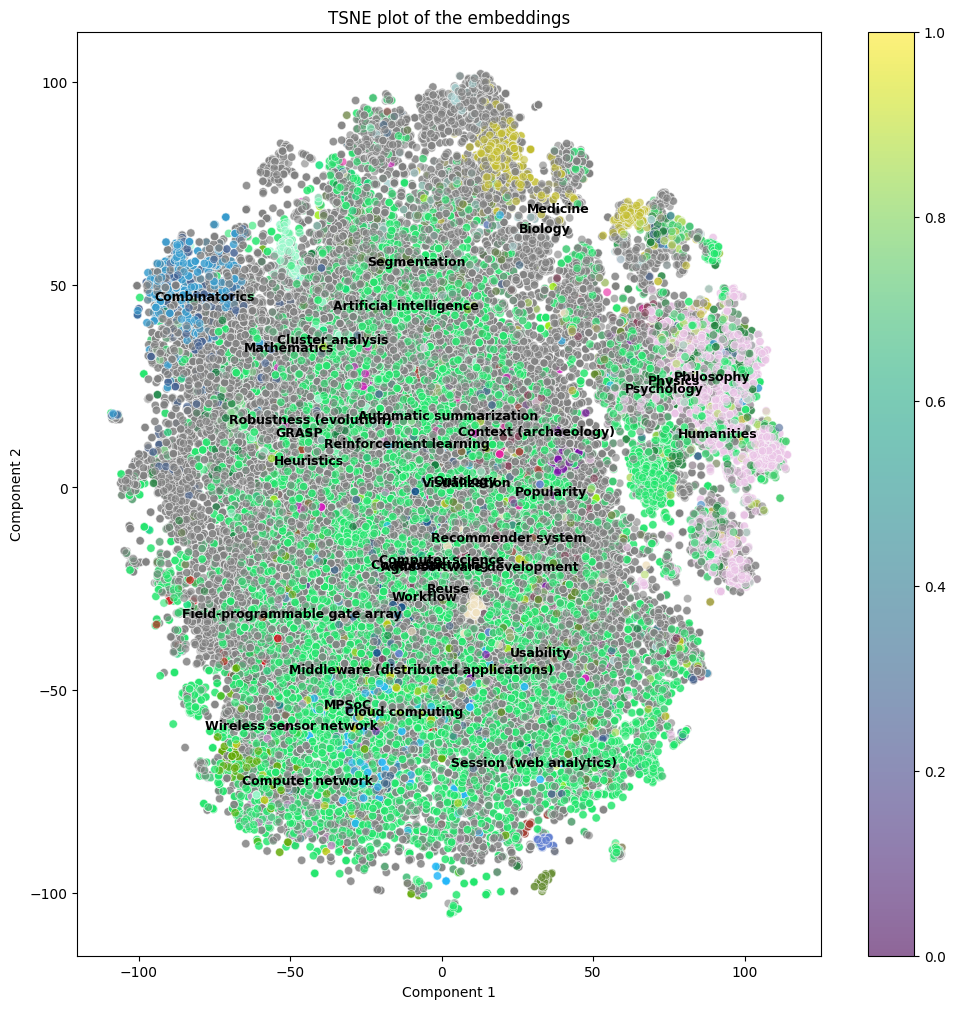

In [14]:
# Média ao longo da dimensão 1 para converter embeddings bidimensionais em unidimensionais
import numpy as np

embeddings_2D = np.mean(embeddings, axis=1)

# Aplicar TSNE
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings_2D)

# Criar uma figura maior
plt.figure(figsize=(12, 12))

# Plotar os embeddings reduzidos
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)

# Obter as áreas de conhecimento a partir do mapa de cores
knowledge_areas = list(color_map.keys())

# Para cada área, encontrar o ponto central e plotar o nome
for area in knowledge_areas:
    # Obtém os pontos desse cluster
    cluster_points = reduced_embeddings[np.array(colors) == color_map[area]]
    
    # Se há pontos no cluster
    if len(cluster_points) > 0:
        # Calcula a média dos pontos para obter o centro
        center_x, center_y = np.mean(cluster_points, axis=0)
        
        # Plotar o nome da área no centro
        plt.text(center_x, center_y, area, fontsize=9, ha='center', va='center', weight='bold')

# Adicionar um mapa de cores (opcional, caso `colors` seja uma lista de valores numéricos)
plt.colorbar(scatter)

# Adicionar título e rótulos aos eixos (opcional)
plt.title("TSNE plot of the embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Mostrar o gráfico
plt.show()
